# AI Literature Analysis

In [1]:
from os import path

import bertopic
import kaggle
import pandas as pd

## Arxiv Dataset

The [Arxiv dataset](https://www.kaggle.com/datasets/Cornell-University/arxiv) was chosen as:

 - Arxiv is widely used within the AI research community, to publish preprints and postprints of papers.
 - The dataset is updated on a weekly basis, which is useful given that the field is both young and evolving rapidly.
 - A team of moderators [re-categorize papers](https://arxiv.org/help/moderation), resulting in robust categories that can be used to pick out just AI research.
 
 To begin we'll download the data and clean it a little:

In [2]:
# Download dataset
data_dir = "/tmp/arxiv"
kaggle.api.dataset_download_files(
    dataset='Cornell-University/arxiv',
    path=data_dir,
    quiet=False,
    unzip=True,
)

# Set as a Pandas Dataframe
data_path = path.join(data_dir, "arxiv-metadata-oai-snapshot.json")
metadata = pd.read_json(data_path, orient="columns", lines=True)

# Clean data
metadata["id"] = metadata["id"].str.split("/").str[-1] # Remove ID prefix
metadata['categories'] = metadata['categories'].str.split(' ') # Convert string separated categories to lists
metadata["update_date"] = pd.to_datetime(metadata["update_date"], format="%Y-%m-%d") # Use date type
metadata.set_index('id', inplace=True) # Set ID as index

# Output key facts
number_papers = len(metadata)
oldest_paper = metadata["update_date"].dt.year.min()
newest_paper = metadata["update_date"].dt.year.max()
"Dataset contains {:,} papers, from {}-{}.".format(number_papers, oldest_paper, newest_paper)

100%|█████████████████████████████████████████| 1.07G/1.07G [00:05<00:00, 197MB/s]


'Dataset contains 2,117,092 papers, from 2007-2022.'

Next we'll select just the relevant categories from the broader [Arxiv taxonomy](https://arxiv.org/category_taxonomy).

<AxesSubplot:xlabel='update_date'>

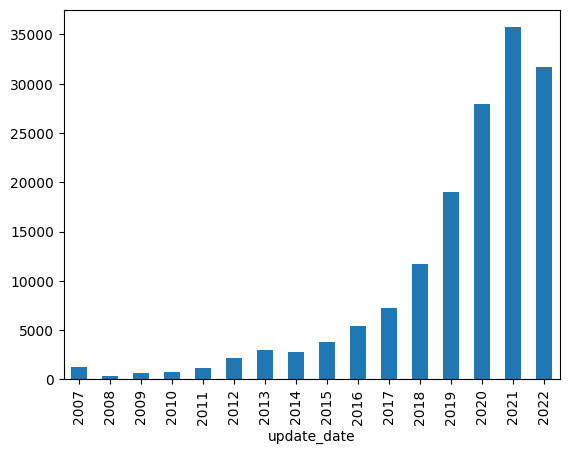

In [8]:
# List of AI categories
relevant_categories = [
    "cs.AI",  # Computer Science: Artificial Intelligence
    "cs.LG",  # Computer Science: Machine Learning
    "stat.ML",  # Statistics: Machine Learning
]

# Apply filter
def check_if_ai_paper(paper_categories: list[str]) -> bool:
    """Determine if the paper is in one of the AI categories"""
    return any(i in paper_categories for i in relevant_categories)

is_ai_paper = metadata["categories"].apply(check_if_ai_paper)
ai_papers = metadata[is_ai_paper]

# Show number of papers over time
ai_papers["update_date"].groupby(ai_papers["update_date"].dt.year).count().plot(kind="bar")